## 앙상블 모델과 단일 모델 성능 비교 <hr>
- 데이터셋 : sklearn.datasets의 breast_cancer
- 유 형 : 지도학습 + 분류
- 방 법 : LogisticRegression, DecisionTree, RandomForest

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(as_frame = True, return_X_y = True)

In [4]:
X.shape, y.shape

((569, 30), (569,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 7,
                                                    test_size = 0.2,
                                                    stratify = y)

[2] 학습 진행 <hr>

[2-1] 선형회귀 LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

[2-2] DecisionTree 알고리즘 기반 분류

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

[2-3] Ensemble 알고리즘 기반 분류

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

- 3개 알고리즘 모델에 대한 성능 평가

In [15]:
print(f'[LogisticRegression] Train : {lr_model.score(X_train, y_train)}, Test : {lr_model.score(X_test, y_test)}')
print(f'[DecisionTree] Train : {dt_model.score(X_train, y_train)}, Test : {dt_model.score(X_test, y_test)}')
print(f'[RandomForest] Train : {rf_model.score(X_train, y_train)}, Test : {rf_model.score(X_test, y_test)}')

[LogisticRegression] Train : 0.9560439560439561, Test : 0.956140350877193
[DecisionTree] Train : 1.0, Test : 0.9649122807017544
[RandomForest] Train : 1.0, Test : 0.956140350877193


In [19]:
rf_model.feature_names_in_, rf_model.feature_importances_

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype=object),
 array([0.00946347, 0.01456568, 0.05313165, 0.01511217, 0.00710836,
        0.00779831, 0.06318509, 0.13328886, 0.00407508, 0.00467876,
        0.02246335, 0.00415821, 0.00661118, 0.05409033, 0.00498706,
        0.00287336, 0.00477055, 0.00319727, 0.00236119, 0.0035545 ,
        0.08317654, 0.02726657, 0.15562559, 0.11543684, 0

In [32]:
featureDF = pd.DataFrame([rf_model.feature_names_in_, rf_model.feature_importances_])
featureDF = featureDF.T
featureDF.set_index(0, inplace = True)
featureDF = featureDF.sort_values(by = 1, ascending = False)

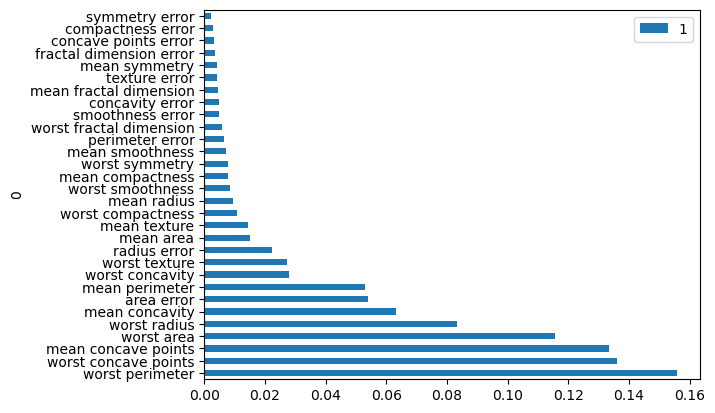

In [33]:
import matplotlib.pyplot as plt
featureDF.plot(kind = 'barh')
plt.show()